In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap.umap_ as umap
import umap.plot
import pynndescent
import seaborn as sns
import matplotlib.colors
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import time      
import os
import json
import random
#Seed for reproducibility
random.seed(0)

%matplotlib inline
warnings.simplefilter("ignore")
sns.set()

In [2]:
filename = "kjv.json"

In [3]:
with open(filename, 'r', encoding='utf-8') as my_file:
    data = json.load(my_file)

In [4]:
data[0]

{'volume_title': 'Old Testament',
 'book_title': 'Genesis',
 'book_short_title': 'Gen.',
 'chapter_number': 1,
 'verse_number': 1,
 'verse_title': 'Genesis 1:1',
 'verse_short_title': 'Gen. 1:1',
 'scripture_text': 'In the beginning God created the heaven and the earth.'}

In [5]:
#Count number of words in each verse
OT=[]
NT=[]
for item in data:
    length = len(item['scripture_text'].split())
    if item['volume_title'] == 'Old Testament':
        OT.append(length)
    if item['volume_title'] == 'New Testament':
        NT.append(length)

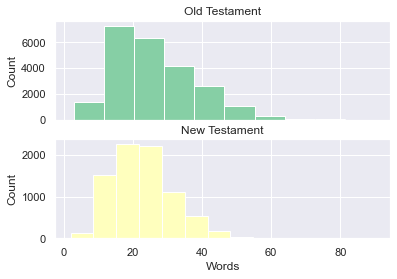

In [6]:
#Visualize number of words in each verse
fig, axs = plt.subplots(2, 1, sharex= True)
axs[0,].hist(OT, color = '#86CFA5')
axs[0].set_title('Old Testament')
axs[1].hist(NT, color = '#FFFFBE')
axs[1].set_title('New Testament')


for ax in axs.flat:
    ax.set(xlabel='Words', ylabel='Count')

for ax in axs.flat:
    ax.label_outer()
plt.rcParams["figure.figsize"] = (20,10)

In [7]:
#Collect the data 
books =[]
verses = []
verse_texts = []
for item in data:
    books.append(item['book_title'])
    verses.append(item['verse_title'])    
    verse_texts.append(item['scripture_text'])    

In [8]:
#load MPNet from HuggingFace hub
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [9]:
#Encode texts into embeddings
embeddings = model.encode(verse_texts)

In [10]:
embeddings

array([[ 0.04081803,  0.04214915,  0.00267177, ..., -0.01361379,
         0.07587241,  0.01894547],
       [ 0.03072013, -0.02628109, -0.02759747, ..., -0.02697419,
        -0.00028245,  0.00164505],
       [ 0.08979865,  0.02224064, -0.04194597, ...,  0.02331562,
        -0.01581011, -0.01863339],
       ...,
       [ 0.0331766 ,  0.03681545, -0.02201083, ...,  0.01500345,
        -0.00369442,  0.01493501],
       [-0.00263459,  0.05635829, -0.04079641, ...,  0.02746628,
         0.00415276, -0.01626955],
       [ 0.01386049,  0.00774721, -0.03857757, ..., -0.05713309,
         0.02580238, -0.01887741]], dtype=float32)

In [11]:
#bible books in chronological order
bible_books =['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges', 'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles', 'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes', 'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel', 'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk', 'Zephaniah', 'Haggai', 'Zechariah', 'Malachi', 'Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians', '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon', 'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude', 'Revelation']

In [12]:
%%time 
#feel free to mess with hyperparameters to change how your graph turns out
default = umap.UMAP(metric="cosine", random_state=42, n_neighbors = 15, min_dist = 0.1).fit(embeddings)


Wall time: 30.9 s


In [13]:
sns.color_palette("rainbow",18)

[(0.39803921568627454, 0.1594757912099808, 0.9967953249171991),
 (0.296078431372549, 0.31486958889350786, 0.987201839553569),
 (0.18627450980392157, 0.47309355683601007, 0.9697969360350095),
 (0.08431372549019611, 0.6075389463388168, 0.9471773565640402),
 (0.025490196078431393, 0.7348449670469757, 0.9160336012803335),
 (0.12745098039215685, 0.8336023852211195, 0.8810121942857845),
 (0.23725490196078436, 0.9160336012803335, 0.8369891083319778),
 (0.3392156862745098, 0.9682760409157589, 0.7905324123001634),
 (0.4490196078431372, 0.9967953249171991, 0.7348449670469757),
 (0.5509803921568628, 0.9967953249171991, 0.678235117349234),
 (0.6607843137254901, 0.9682760409157589, 0.6124202030492502),
 (0.7627450980392156, 0.9160336012803335, 0.5472195469221112),
 (0.8725490196078431, 0.8336023852211194, 0.47309355683601007),
 (0.9745098039215687, 0.7348449670469757, 0.4011015349327188),
 (1.0, 0.6075389463388169, 0.3207102355902552),
 (1.0, 0.4730935568360101, 0.24391372010837717),
 (1.0, 0.31486958889350797, 0.15947579120998084),
 (1.0, 0.1594757912099809, 0.07999425118854168)]

<AxesSubplot:>

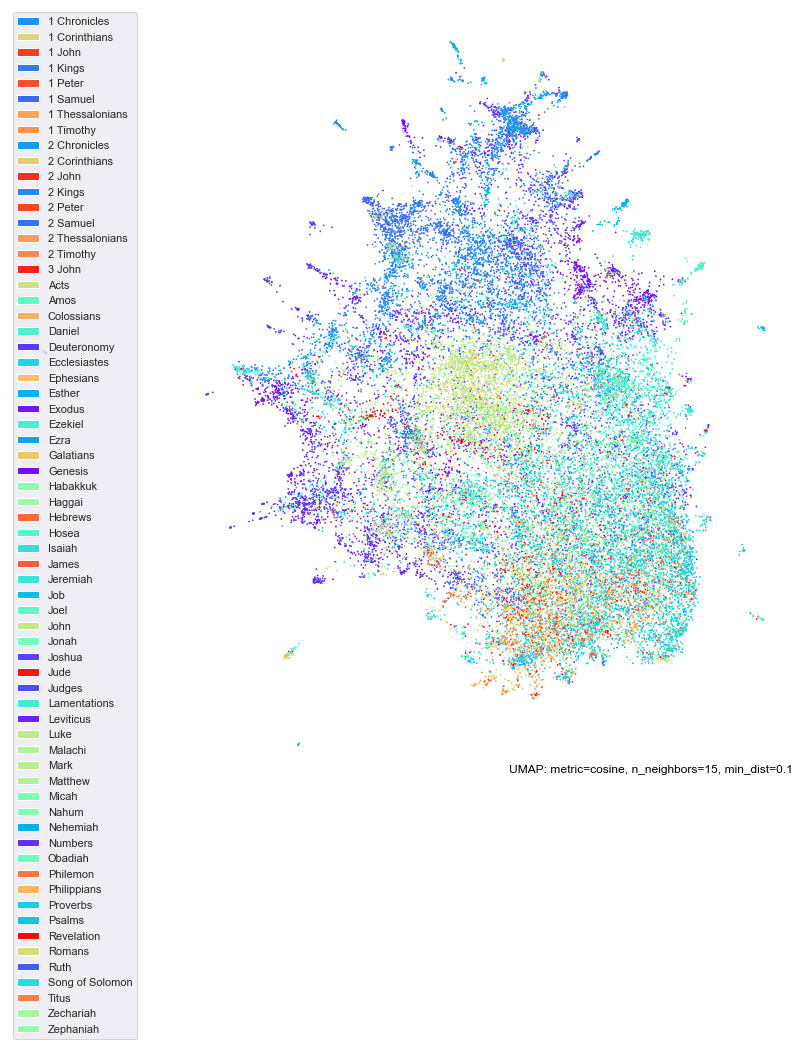

In [14]:
color_key = {}
#there are 66 books in the Old Testament, so we assign books colors on a rainbow gradient here
for l, c in zip(bible_books, sns.color_palette("rainbow", 66)):
    color_key[l] = matplotlib.colors.rgb2hex(c)
umap.plot.points(
    default,
    labels=np.array(books),
    color_key=color_key,
    width=1024,
    height=1024,
)

In [15]:
#umap has a built-in interactive plot
p = umap.plot.interactive(
    default,
    labels=np.array(books),
    color_key=color_key,
    width=980,
    height=1000,
    alpha = 0.7,
    in_radius = 0.01,
    hover_data = pd.DataFrame({'index':np.arange(len(verses)),
                           'label':verses})
)


In [16]:
umap.plot.output_notebook()

Loading BokehJS ...

In [17]:
umap.plot.show(p)

In [18]:
coords = umap.UMAP(metric="cosine", random_state=42, min_dist = 0.1).fit_transform(embeddings)

In [19]:
coords

array([[10.07145   ,  0.32392645],
       [10.082866  ,  1.6666249 ],
       [10.943175  ,  0.34855235],
       ...,
       [11.843401  ,  2.1340506 ],
       [10.996997  , -1.6426721 ],
       [10.375517  , -2.6705525 ]], dtype=float32)

In [20]:
def scale_coords(coords):
    #scale coordinates into quadrant 1, with smallest x and y coordinates at 0
    out= []
    xs = [item[0]for item in coords]
    ys = [item[1]for item in coords]
    smallest_x = min(xs)
    smallest_y = min(ys)
    smallest_x = smallest_x *-1
    smallest_y = smallest_y *-1
    for pair in coords:
        out.append([pair[0]+smallest_x, pair[1]+smallest_y])
    return out
        

In [21]:
coords_scaled = scale_coords(coords)

In [22]:
scrips=[]
labels = []
verses = []
allowed_books = ['Old Testament', 'New Testament']
for item in data:
    if item['volume_title'] in allowed_books:
        scrips.append(item['scripture_text'])
        labels.append(item['book_title'])
        verses.append(item['verse_short_title'])   

In [23]:
out = []
for i in range(len(coords_scaled)):    
    obj = {}
    obj['x'] = int(coords_scaled[i][0] * 100000)
    obj['y'] = int(coords_scaled[i][1] * 100000)
    obj['book'] = labels[i]
    obj['text'] = scrips[i]
    obj['ref'] = verses[i]
    obj['color'] = color_key[labels[i]]

    out.append(obj)

In [24]:
with open('scatter.json', 'w')as my_file:
    my_file.write(json.dumps(out, indent = 2))

I've also included a t-SNE implementation, which I don't think perfoms as well.

In [25]:
#t-SNE https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#We need to do PCA first to get the number of dimensions down
pca = PCA(n_components=50)
pca_result = pca.fit_transform(embeddings)
for i in range(0,55,5):
    print(f'Variance explained by first {i} components: {str(round(sum(pca.explained_variance_ratio_[:i]), 2))}%')

Variance explained by first 0 components: 0%
Variance explained by first 5 components: 0.19%
Variance explained by first 10 components: 0.28%
Variance explained by first 15 components: 0.35%
Variance explained by first 20 components: 0.4%
Variance explained by first 25 components: 0.44%
Variance explained by first 30 components: 0.48%
Variance explained by first 35 components: 0.51%
Variance explained by first 40 components: 0.54%
Variance explained by first 45 components: 0.57%
Variance explained by first 50 components: 0.59%


In [26]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 31102 samples in 0.001s...
[t-SNE] Computed neighbors for 31102 samples in 17.977s...
[t-SNE] Computed conditional probabilities for sample 1000 / 31102
[t-SNE] Computed conditional probabilities for sample 2000 / 31102
[t-SNE] Computed conditional probabilities for sample 3000 / 31102
[t-SNE] Computed conditional probabilities for sample 4000 / 31102
[t-SNE] Computed conditional probabilities for sample 5000 / 31102
[t-SNE] Computed conditional probabilities for sample 6000 / 31102
[t-SNE] Computed conditional probabilities for sample 7000 / 31102
[t-SNE] Computed conditional probabilities for sample 8000 / 31102
[t-SNE] Computed conditional probabilities for sample 9000 / 31102
[t-SNE] Computed conditional probabilities for sample 10000 / 31102
[t-SNE] Computed conditional probabilities for sample 11000 / 31102
[t-SNE] Computed conditional probabilities for sample 12000 / 31102
[t-SNE] Computed conditional probabilities for s

In [27]:
df = pd.DataFrame()

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

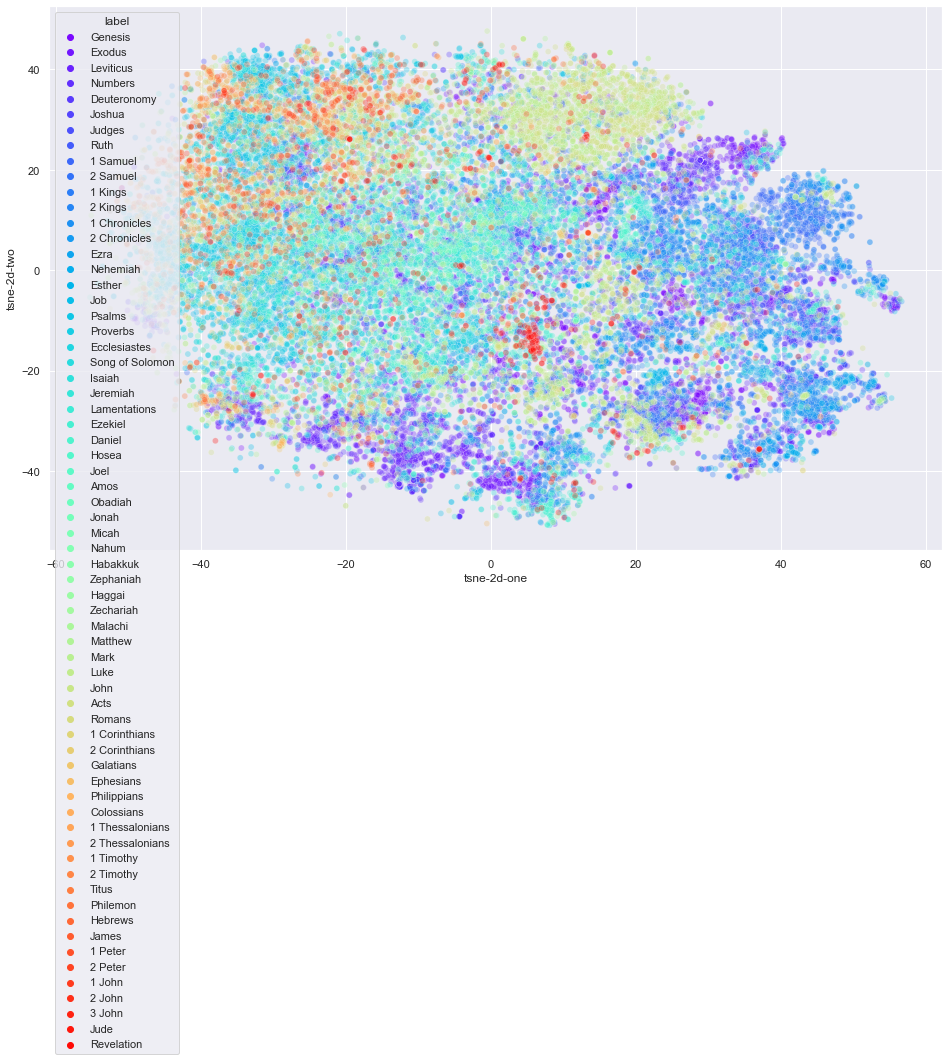

In [28]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
df['label'] = labels
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("rainbow", 66),
    hue = 'label',
    data=df,
    legend="full",
    alpha=0.3
)